In [1]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace, RectFace
from noc_tree import Targeter
import numpy as np
%matplotlib inline

In [2]:
# waypoint sequence
wps = np.array([
    [100, 100, -10],
    [100, -100, -5],
    [-100, -100, -5]
])

# instantiate the NOC mission tree, which inherits from pybodhi.Tree
bt = Targeter(wps)

In [3]:
# Newick format https://en.wikipedia.org/wiki/Newick_format
newick = bt.newick()
newick

'(((((_shutdown_payload, _payload_off)?, (_go_to_surface, _at_surface)?)→, _mission_done)?, ((_update_target_waypoint, (_go_to_target_waypoint, _at_target_waypoint)?)→, _mission_complete)?, (((_update_autonomy_waypoints, _no_autonomy_waypoints)?, (_update_commanded_waypoints, _no_commanded_waypoints)?, (_go_to_surface, _no_go_to_surface)?)→, _mission_synchronised)?, (((_wait_for_continue, _continue_command_received)?, (_adjust_depth, _at_target_depth)?, (_turn_on_payload, _payload_on)?, (_calibrate_compass, _compass_calibrated)?, (_wait_for_go, _go_command_received)?, (_keep_distance, _away_from_ship)?)→, _continue_command_received)?, (_avoid_obstacles, _path_obstacle_free)?, ((_go_to_surface, _drop_weight, _set_mission_abort)→, (_depth_okay, _no_leaks, _prop_operational, _actuator_operational, _able_to_descend, _mission_not_aborted)→)?)→)Ø;'

In [4]:
t = Tree(newick, format=1)

In [5]:
print(t.get_ascii(show_internal=True))


               /-_shutdown_payload
            /?|
           |   \-_payload_off
         /→|
        |  |   /-_go_to_surface
      /?|   \?|
     |  |      \-_at_surface
     |  |
     |   \-_mission_done
     |
     |      /-_update_target_waypoint
     |   /→|
     |  |  |   /-_go_to_target_waypoint
     |-?|   \?|
     |  |      \-_at_target_waypoint
     |  |
     |   \-_mission_complete
     |
     |         /-_update_autonomy_waypoints
     |      /?|
     |     |   \-_no_autonomy_waypoints
     |     |
     |     |   /-_update_commanded_waypoints
     |   /→|-?|
     |  |  |   \-_no_commanded_waypoints
     |  |  |
     |-?|  |   /-_go_to_surface
     |  |   \?|
     |  |      \-_no_go_to_surface
     |  |
     |   \-_mission_synchronised
     |
     |         /-_wait_for_continue
     |      /?|
     |     |   \-_continue_command_received
     |     |
-Ø /→|     |   /-_adjust_depth
     |     |-?|
     |     |   \-_at_target_depth
     |     |
     |     |   /-_turn_on_payloa

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `noc_tree_circ.pdf'.


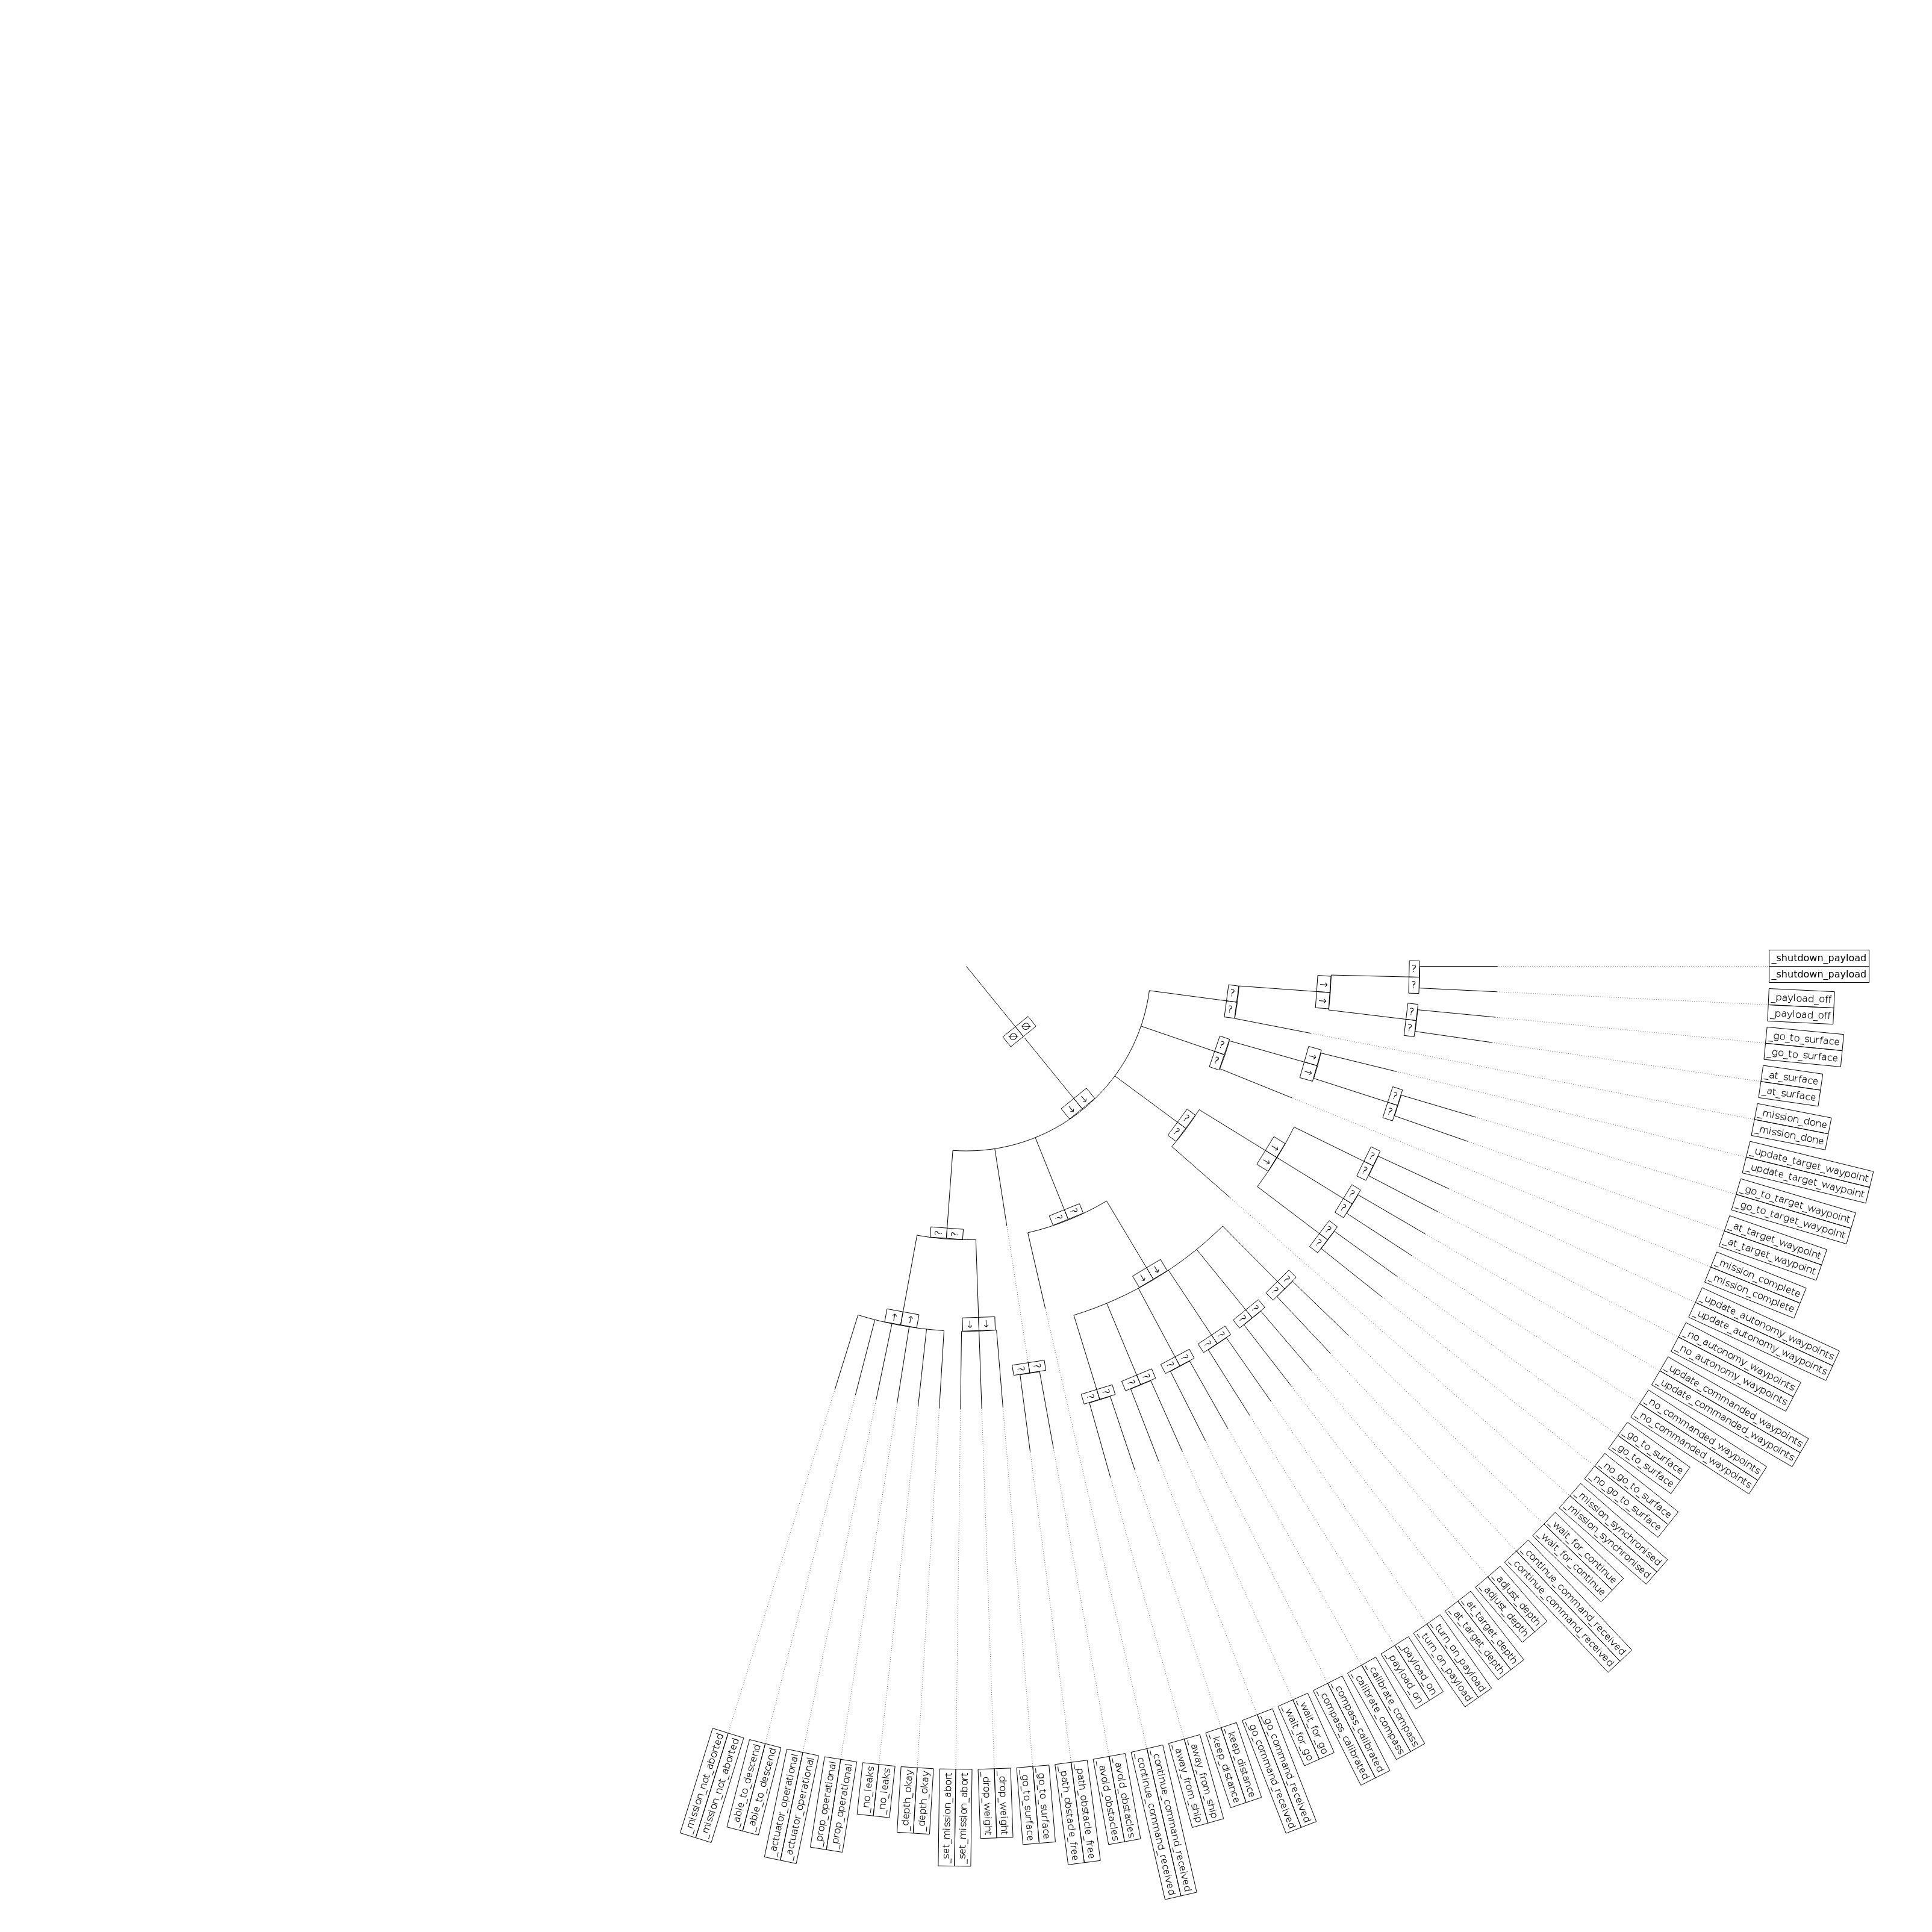

In [88]:
t = Tree(newick, format=1)
ts = TreeStyle()
ts.show_leaf_name = False
ts.mode = "c"
ts.arc_start = 0
ts.arc_span = 110
ts.force_topology = True
ts.optimal_scale_level = "mid"
ts.show_scale=False
ts.min_leaf_separation = 10
ts.branch_vertical_margin = 10


def layout(node):
    # remove marker
    node.img_style["size"] = 0
    # add indicator
    F = TextFace(node.name, tight_text=False, fsize=12)
    n=4
    F.border.width = 1
    F.margin_left=n
    F.margin_right=n
    F.margin_bottom=n
    F.margin_top=n
    node.add_face(F, 0, "branch-right")
    
ts.layout_fn = layout

t.render("noc_tree_circ.pdf",tree_style=ts)
#!convert noc_tree_circ.png -trim noc_tree_circ.png
!pdfcrop noc_tree_circ.pdf noc_tree_circ.pdf
t.render("%%inline", tree_style=ts)

In [78]:
t = Tree(newick, format=1)
ts = TreeStyle()
ts.show_leaf_name = False
ts.mode = "r"
ts.force_topology = True
ts.optimal_scale_level = "full"
ts.show_scale=False
ts.rotation = 90
ts.min_leaf_separation = 10
ts.branch_vertical_margin = 10
ts.scale = 15


def layout(node):
    # remove marker
    node.img_style["size"] = 0
    # add indicator
    F = TextFace(node.name, tight_text=False, fsize=12)
    F.rotation = -90 if node.name == "?" or node.name == "→" or node.name == "Ø" else 0
    F.hz_align=2
    F.vt_align=2
    F.border.width = 1
    F.margin_left=1
    F.margin_right=1
    F.margin_bottom=1
    F.margin_top=1
    F.rotable = False
    node.add_face(F, 0, "branch-right")
    
ts.layout_fn = layout

t.render("noc_tree_rec.png",tree_style=ts, dpi=4000)
!convert noc_tree_rec.png -trim noc_tree_rec.png
#!pdfcrop noc_tree_rec.pdf noc_tree_rec.pdf
#t.render("%%inline", tree_style=ts)